In [1]:
# Mounting google drive for running the notebook on Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Problem Statement
Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings.

In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.

1. Data sourcing and sentiment analysis.
2. Building a recommendation system.
3. Improving the recommendations using the sentiment analysis model.
4. Deploying the end-to-end project with a user interface.

#Pipelines that needs to be performed :
We need to perform the following seven major tasks to complete the project:

1. Exploratory data analysis (EDA)

2. Data cleaning

3. Text preprocessing

4. Feature extraction

5. Training a text classification model(need to build at least three ML models out of below 4 models)

a. Logistic regression b. Random forest c. XGBoost d. Naive Bayes Out of these four models, we will select one classification model based on its performance.

6. Building a recommendation system (User-based recommendation system and Item-based recommendation system).

A. Improving the recommendations using the sentiment analysis model.

7. Create flask application.

8. Deployment of this end to end project on heroku platform.

In [2]:
#   Importing the necessary libraries

import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,f1_score,precision_score,accuracy_score
from sklearn.metrics import pairwise_distances
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier 
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('max_colwidth', 500)

In [4]:
# importing the labeled data. 
import pandas as pd
df_Original = pd.read_csv('/content/gdrive/MyDrive/sample30.csv')
df = df_Original.copy()
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,Negative


# 1.Exploratory Data Analysis

In [5]:
df.shape  

(30000, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [7]:
#Lets check the count of reviews distributed over purchase

print("Count of Reviews which are related to a Purchase:")
df['reviews_didPurchase'].value_counts()

Count of Reviews which are related to a Purchase:


False    14498
True      1434
Name: reviews_didPurchase, dtype: int64

Observation: There is very less number of reviews based on the actual purchase, and almost 50% data is missing, this column will not be of much significant. We will be dropping it later

In [8]:
# There is one row without user_sentiment label. We will drop the row later. 

df[df['user_sentiment'].isna()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
28354,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & TV,Disney,Blu-ray,Children & Family,Movies & Music,Movies & TV Shows,Electronics, Tech Toys, Movies, Music,Blu-Rays,See ALL Blu-Ray,Frys",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),2014-11-07T00:00:00.000Z,NaN,True,5,my kids absolutely loved this film so much that we watched it twice. Having a digital copy means that every time we get in the car we get to watch it wherever we go. we even got to use our $5 reward coupon towards the purchase of this movie so we got an additional $5 off + we got to add the points towards our next rewards coupon we love the savings we get at Best Buy,a super hit with my children. they loved it!!??,NaN,mamad,7.87E+11,NaN


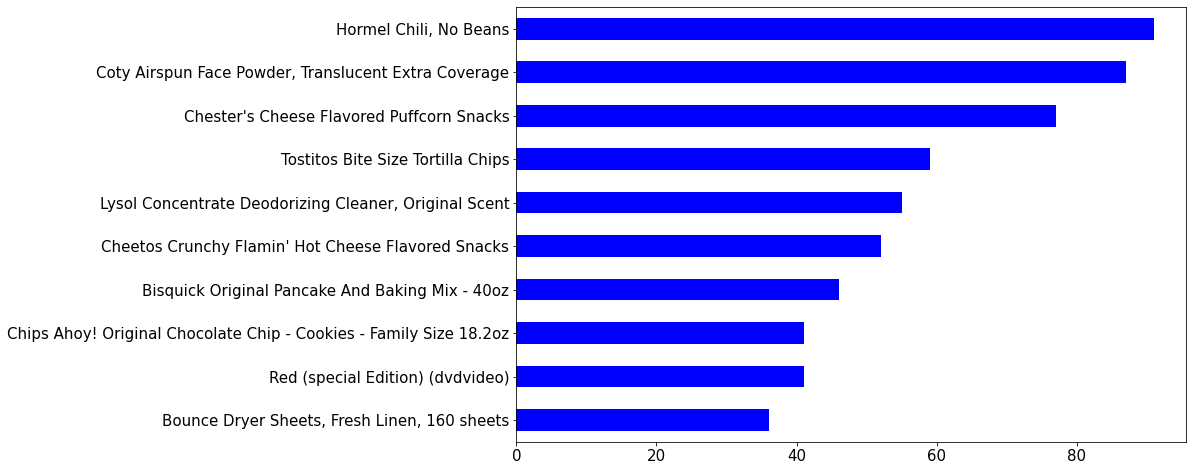

In [9]:
#Checking top 10 most purchased product
result = df[df['reviews_didPurchase'] == True]
result['name'].value_counts()[0:10].plot(kind = 'barh', figsize=[12,8], fontsize=15,color='Blue').invert_yaxis()

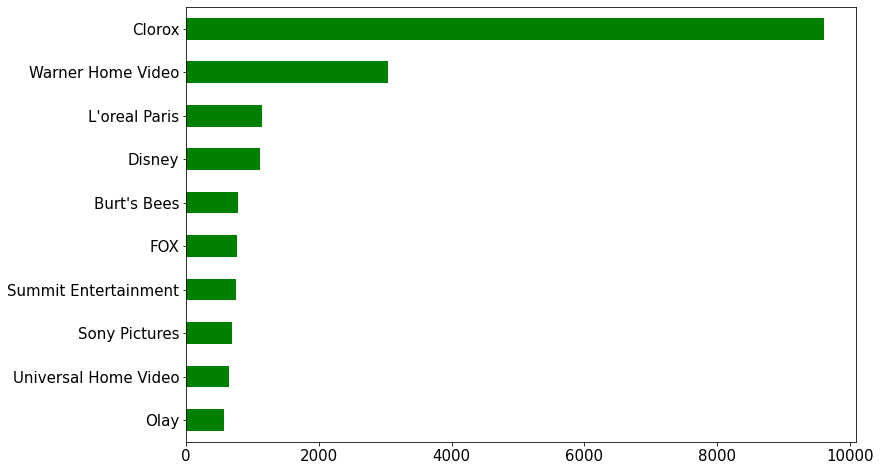

In [10]:
#Checking top 10 most trusted brands based on the positive review
from matplotlib import cm
result = df[(df.user_sentiment=="Positive")]
result['brand'].value_counts()[0:10].plot(kind = 'barh', figsize=[12,8], fontsize=15,color='Green').invert_yaxis()

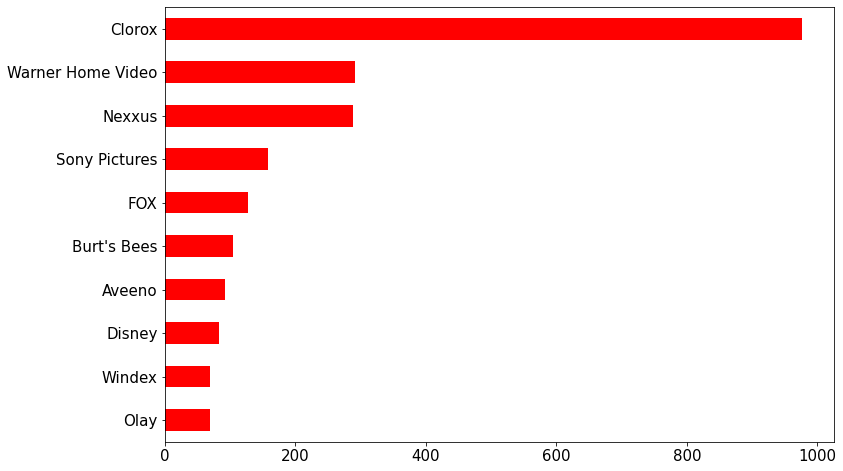

In [11]:
#Checking top 10 most badly rated brands based on the negative review
from matplotlib import cm
result = df[(df.user_sentiment=="Negative")]
result['brand'].value_counts()[0:10].plot(kind = 'barh', figsize=[12,8], fontsize=15,color='Red').invert_yaxis()

Observation: Clorox brand has most number of positive and negative reviews. It looks like Clorox is most reviewed brand.

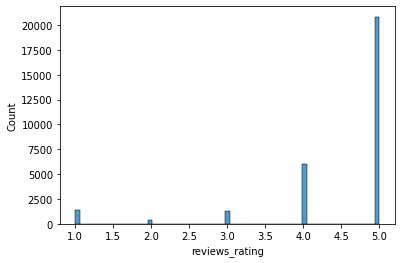

In [12]:
# Number of occurences for each rating 
sns.histplot(x=df['reviews_rating'])
plt.show()

#### observation: Most Reviews are rating 5.

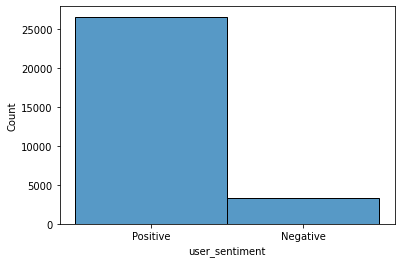

In [13]:
# Number of Postive and Negatives user sentiments shows the class imbalance

sns.histplot(x=df['user_sentiment'])
plt.show()

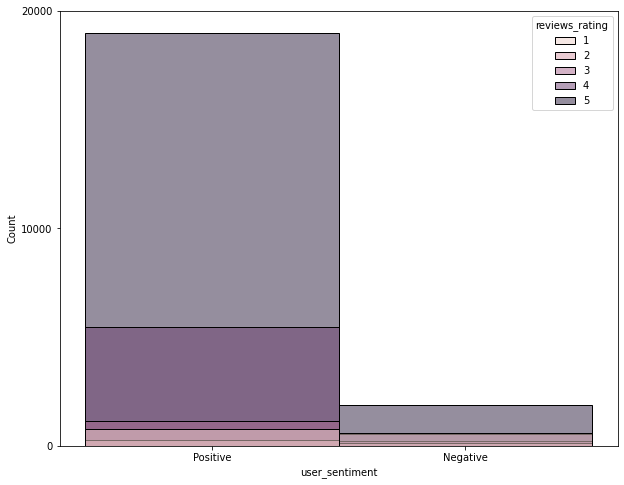

In [14]:
# To see any corrections are required in the dataframe is required using rating and user sentiment 
from IPython.core.pylabtools import figsize
figsize(10,8)
sns.histplot(hue=df['reviews_rating'],x=df['user_sentiment'])
plt.yticks(np.arange(0,30000,10000))
plt.show()

#### From the above graph we can see that there are some 5 rating in the negative sentiment which should be corrected in the Data Cleaning section

In [15]:
df['user_sentiment'].value_counts()

Positive    26632
Negative     3367
Name: user_sentiment, dtype: int64

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


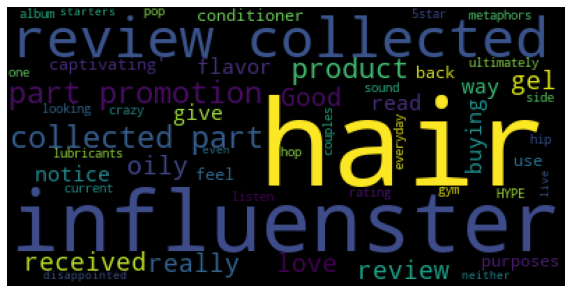

In [16]:
# To Check the most word occurence using word cloud
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stoplist = set(stopwords.words('english'))

wordcloud = WordCloud(stopwords=stoplist,max_words=50).generate(str(df['reviews_text']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 2. DATA CLEANING

In [17]:
# Checking null values
df.isnull().sum().sort_values(ascending = False)

reviews_userProvince    29830
reviews_userCity        28071
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_title             190
manufacturer              141
reviews_username           63
reviews_date               46
user_sentiment              1
id                          0
brand                       0
categories                  0
name                        0
reviews_rating              0
reviews_text                0
dtype: int64

In [18]:
# We will drop columns with high number of missing values, as they are not so significant.
# reviews_date, reviews_doRecommend, reviews_userCity, reviews_userProvince

df.drop(['reviews_date', 'reviews_doRecommend', 'reviews_userCity', 'reviews_userProvince', 'reviews_didPurchase'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                30000 non-null  object
 1   brand             30000 non-null  object
 2   categories        30000 non-null  object
 3   manufacturer      29859 non-null  object
 4   name              30000 non-null  object
 5   reviews_rating    30000 non-null  int64 
 6   reviews_text      30000 non-null  object
 7   reviews_title     29810 non-null  object
 8   reviews_username  29937 non-null  object
 9   user_sentiment    29999 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.3+ MB


In [19]:
# Filling the missing values with nan.

df[df['reviews_title']== '']=np.nan
df[df['manufacturer']== '']=np.nan
df[df['reviews_username']== '']=np.nan
df[df['user_sentiment']== '']=np.nan


In [20]:
# Remove all rows where there is Nan that means there is no complaints raised.

df = df.dropna(subset= ['reviews_title', 'manufacturer', 'reviews_username', 'user_sentiment'])

In [21]:
# checking once again for the null values.
df.isnull().sum()

id                  0
brand               0
categories          0
manufacturer        0
name                0
reviews_rating      0
reviews_text        0
reviews_title       0
reviews_username    0
user_sentiment      0
dtype: int64

In [22]:
# checking the count of the "user_sentiment" columns before correction.

df.user_sentiment.value_counts()

Positive    26295
Negative     3311
Name: user_sentiment, dtype: int64

In [23]:
# for correcting the user sentiment according to rating. 

def clean_sentiment(x):
  if x >= 3 :
    return 'Positive'
  elif x > 0 and x < 3  :
    return 'Negative' 

In [24]:
df['user_sentiment'] = df['reviews_rating'].apply(clean_sentiment)
df.head()

,id,brand,categories,manufacturer,name,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),5.0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5.0,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5.0,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,1.0,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,1.0,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,Negative


In [25]:
# After corrections for user sentiment 
df['user_sentiment'].value_counts()

Positive    27840
Negative     1766
Name: user_sentiment, dtype: int64

# 3. Text Preprocessing

In [26]:
# Function to clean the text using re library.

df.reviews_text = df.reviews_text.astype(str)
def clean_text(text):
    text = text.lower() # make text lowercase.
    
    text = re.sub(r'\[.*?\]', '', text) #Regex function to remove text in square bracket.
    
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation.
    
    text = re.sub(r'\w*\d\w*', '', text) # Remove words containing numbers.
    
    return text


In [27]:
#lemmatize the text after cleaning and removing the stopwords. 

def lemmatize_text(text):
    text= clean_text(text)
    sent = nlp(text)
    sentence = [token.lemma_ for token in sent if token not in set(stopwords.words('english'))]
    return " ".join(sentence)

In [28]:
# Take the Review text and user sentiment as new dataframe. 
df_clean = df[['reviews_text','user_sentiment']]
df_clean.head()

,reviews_text,user_sentiment
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Positive
1,Good flavor. This review was collected as part of a promotion.,Positive
2,Good flavor.,Positive
3,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Negative
4,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative


In [29]:
# create a new column Lemmatized_review using the Lemmatize_text function.
df_clean['lemmatized_text'] = df_clean['reviews_text'].apply(lemmatize_text)
df_clean.head()

,reviews_text,user_sentiment,lemmatized_text
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Positive,i love this album -PRON- very good more to the hip hop side than -PRON- current pop sound so hype i listen to this everyday at the gym i give -PRON- rate all the way -PRON- metaphor be just crazy
1,Good flavor. This review was collected as part of a promotion.,Positive,good flavor this review be collect as part of a promotion
2,Good flavor.,Positive,good flavor
3,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Negative,i read through the review on here before look in to buy one of the couple lubricant and be ultimately disappointed that -PRON- do not even live up to the review i have read for starter neither -PRON- boyfriend nor i could notice any sort of enhanced or captivating sensation what -PRON- do notice however be the messy consistency that be reminiscent of a more liquidy vaseline -PRON- be difficult to clean up and be not a pleasant especially since -PRON- lack the captivating sensation -PRON- hav...
4,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative,-PRON- husband buy this gel for -PRON- the gel cause irritation and -PRON- feel like -PRON- be burn -PRON- skin i would not recommend this gel


In [30]:
# Replacing the -PRON- with spaces
df_clean['lemmatized_text'] = df_clean['lemmatized_text'].str.replace('-PRON-','')
df_clean.head()

,reviews_text,user_sentiment,lemmatized_text
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Positive,i love this album very good more to the hip hop side than current pop sound so hype i listen to this everyday at the gym i give rate all the way metaphor be just crazy
1,Good flavor. This review was collected as part of a promotion.,Positive,good flavor this review be collect as part of a promotion
2,Good flavor.,Positive,good flavor
3,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Negative,i read through the review on here before look in to buy one of the couple lubricant and be ultimately disappointed that do not even live up to the review i have read for starter neither boyfriend nor i could notice any sort of enhanced or captivating sensation what do notice however be the messy consistency that be reminiscent of a more liquidy vaseline be difficult to clean up and be not a pleasant especially since lack the captivating sensation have both be expect be disappoint that...
4,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative,husband buy this gel for the gel cause irritation and feel like be burn skin i would not recommend this gel


In [31]:
# Creating new DataFrame with lemmatized_text and user_sentiment.

Data = df_clean[['lemmatized_text', 'user_sentiment']]
Data.head() 

,lemmatized_text,user_sentiment
0,i love this album very good more to the hip hop side than current pop sound so hype i listen to this everyday at the gym i give rate all the way metaphor be just crazy,Positive
1,good flavor this review be collect as part of a promotion,Positive
2,good flavor,Positive
3,i read through the review on here before look in to buy one of the couple lubricant and be ultimately disappointed that do not even live up to the review i have read for starter neither boyfriend nor i could notice any sort of enhanced or captivating sensation what do notice however be the messy consistency that be reminiscent of a more liquidy vaseline be difficult to clean up and be not a pleasant especially since lack the captivating sensation have both be expect be disappoint that...,Negative
4,husband buy this gel for the gel cause irritation and feel like be burn skin i would not recommend this gel,Negative


In [32]:
#Encode the negative and postive to 0 and 1 respectively 
Data['user_sentiment'] = df_clean['user_sentiment'].map({'Negative':0,'Positive':1})
Data.head()

,lemmatized_text,user_sentiment
0,i love this album very good more to the hip hop side than current pop sound so hype i listen to this everyday at the gym i give rate all the way metaphor be just crazy,1
1,good flavor this review be collect as part of a promotion,1
2,good flavor,1
3,i read through the review on here before look in to buy one of the couple lubricant and be ultimately disappointed that do not even live up to the review i have read for starter neither boyfriend nor i could notice any sort of enhanced or captivating sensation what do notice however be the messy consistency that be reminiscent of a more liquidy vaseline be difficult to clean up and be not a pleasant especially since lack the captivating sensation have both be expect be disappoint that...,0
4,husband buy this gel for the gel cause irritation and feel like be burn skin i would not recommend this gel,0


In [33]:
#Saving data for future purpose

import pickle as pickle
pickle.dump(Data, open("df_new.pkl","wb"))

## Dividing the dataset into train and test data and handle the class imbalance.
Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.
The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important

In [34]:
# Splitting the data into train and test data set.
x_train, x_test, y_train, y_test = train_test_split(Data['lemmatized_text'], Data['user_sentiment'], train_size = 0.75, random_state=45, stratify=Data['user_sentiment'])
y_train.value_counts()

1    20880
0     1324
Name: user_sentiment, dtype: int64

# 4.Feature Extraction using TF-IDF vectorization.

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer()
x_count = count_vect.fit_transform(x_train)

tfidf_transformer = TfidfTransformer()
x_train_transformed = tfidf_transformer.fit_transform(x_count)
x_train_transformed.shape


(22204, 14282)

In [36]:
#Saving the vocabulary used in countvectorizer and TFIDF Transformer

import pickle
pickle.dump(count_vect,open('count_vector.pkl','wb'))
pickle.dump(tfidf_transformer,open('tfidf_transformer.pkl','wb'))


In [37]:
#Checking Class Imbalance 

Data.groupby(['user_sentiment']).count()

,lemmatized_text
user_sentiment,
0,1766
1,27840


Conclussion: There is big difference between positive and negative labels, class imbalance is present. We would use SMOTE technique to handle the class imbalance.

In [38]:
# Handling Class Imbalance

from collections import Counter
from imblearn.over_sampling import SMOTE # (Synthetic Minority Oversampling Technique)

count = Counter(y_train)
print('Before sampling :',count)

sampler = SMOTE()

x_train_sm,y_train_sm = sampler.fit_resample(x_train_transformed,y_train)

count = Counter(y_train_sm)
print('After sampling :',count)

Before sampling : Counter({1: 20880, 0: 1324})
After sampling : Counter({1: 20880, 0: 20880})


# 5. Training text classification model
We need to build at least three ML models. We then need to analyse the performance of each of these models and choose the best model. At least three out of the following four models need to be built

A. Logistic Regression

B. RandomForest Classifier

C. XGBoost Classifier
  
D. Naive Bayes

**Defining metrics for model evaluation**

We will now define the metrics based on which models will be evaluated.

We will look at the accuracy of the model which will tell us what fraction of prediction is correct.

Looking from consumer's point of view, recommending products with negative sentiments will make consumers lose interest in checking the recommended products. It means positive predictive rate should be good. So we will look at the precision of the model.

At the same time, missing to recommend products with positive sentiments will cause business loss. So, the sensitivity of the model should also be good.

And since we want to look at both preicsion and sensitivity, F1-score will also be useful for us

In [39]:
# Function for Metrics
Model_performance=[]
def model_metrics(y,y_pred,model_name,metrics):
  Accuracy = accuracy_score(y,y_pred)
  roc = roc_auc_score(y,y_pred)
  confusion = confusion_matrix(y,y_pred)
  precision = precision_score(y,y_pred)
  f1 = f1_score(y,y_pred)
  TP = confusion[1,1]  # true positive
  TN = confusion[0,0]  # true negatives
  FP = confusion[0,1]  # false positives
  FN = confusion[1,0]  # false negatives
  sensitivity= TP / float(TP+FN)
  specificity = TN / float(TN+FP)

  print("*"*50)
  print('Confusion Matrix =')
  print(confusion)
  print("sensitivity of the %s = %f" % (model_name,round(sensitivity,2)))
  print("specificity of the %s = %f" % (model_name,round(specificity,2)))
  print("Accuracy Score of %s = %f" % (model_name,Accuracy))
  print('ROC AUC score of %s = %f' % (model_name,roc))
  print("Report=",)
  print(classification_report(y,y_pred))
  print("*"*50)
  metrics.append(dict({'Model_name':model_name,
                       'Accuracy':Accuracy,
                       'Roc_auc_score':roc,
                       'Precision':precision,
                       'F1_score':f1}))
  return metrics



# A. Logistic Regression

In [40]:
lr = LogisticRegression()
lr.fit(x_train_sm, y_train_sm)

LogisticRegression()

In [41]:
y_pred = lr.predict(x_train_sm)
Model_performance = model_metrics(y_train_sm, y_pred, 'Logistic Regression', Model_performance)

**************************************************
Confusion Matrix =
[[20547   333]
 [  623 20257]]
sensitivity of the Logistic Regression = 0.970000
specificity of the Logistic Regression = 0.980000
Accuracy Score of Logistic Regression = 0.977107
ROC AUC score of Logistic Regression = 0.977107
Report=
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     20880
           1       0.98      0.97      0.98     20880

    accuracy                           0.98     41760
   macro avg       0.98      0.98      0.98     41760
weighted avg       0.98      0.98      0.98     41760

**************************************************


# B. RandomForest Classifier

In [42]:
# Fitting a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(x_train_sm, y_train_sm)

RandomForestClassifier()

In [43]:
y_pred_rf = rf.predict(x_train_sm)
Model_performance = model_metrics(y_train_sm, y_pred_rf,'RandomForestClassifier', Model_performance)

**************************************************
Confusion Matrix =
[[20879     1]
 [    0 20880]]
sensitivity of the RandomForestClassifier = 1.000000
specificity of the RandomForestClassifier = 1.000000
Accuracy Score of RandomForestClassifier = 0.999976
ROC AUC score of RandomForestClassifier = 0.999976
Report=
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20880
           1       1.00      1.00      1.00     20880

    accuracy                           1.00     41760
   macro avg       1.00      1.00      1.00     41760
weighted avg       1.00      1.00      1.00     41760

**************************************************


In [44]:
Model_performance

[{'Accuracy': 0.9771072796934865,
  'F1_score': 0.9769471907402942,
  'Model_name': 'Logistic Regression',
  'Precision': 0.9838271005342399,
  'Roc_auc_score': 0.9771072796934867},
 {'Accuracy': 0.9999760536398468,
  'F1_score': 0.9999760542132612,
  'Model_name': 'RandomForestClassifier',
  'Precision': 0.9999521095732963,
  'Roc_auc_score': 0.9999760536398468}]

# C. XGBoost Classifier

In [45]:
# Fitting a XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train_sm,y_train_sm)

XGBClassifier()

In [46]:
y_pred_xgbc = xgb_classifier.predict(x_train_sm)
Model_performance = model_metrics(y_train_sm,y_pred_xgbc,'XGBClassifier',Model_performance)

**************************************************
Confusion Matrix =
[[19555  1325]
 [  698 20182]]
sensitivity of the XGBClassifier = 0.970000
specificity of the XGBClassifier = 0.940000
Accuracy Score of XGBClassifier = 0.951557
ROC AUC score of XGBClassifier = 0.951557
Report=
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     20880
           1       0.94      0.97      0.95     20880

    accuracy                           0.95     41760
   macro avg       0.95      0.95      0.95     41760
weighted avg       0.95      0.95      0.95     41760

**************************************************


# D. Naive Bayes Classifier

In [47]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train_sm,y_train_sm)

MultinomialNB()

In [48]:
y_pred_mnb = mnb.predict(x_train_sm)
Model_performance = model_metrics(y_train_sm,y_pred_mnb,'Naive_Bayes',Model_performance)

**************************************************
Confusion Matrix =
[[20195   685]
 [ 1585 19295]]
sensitivity of the Naive_Bayes = 0.920000
specificity of the Naive_Bayes = 0.970000
Accuracy Score of Naive_Bayes = 0.945642
ROC AUC score of Naive_Bayes = 0.945642
Report=
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     20880
           1       0.97      0.92      0.94     20880

    accuracy                           0.95     41760
   macro avg       0.95      0.95      0.95     41760
weighted avg       0.95      0.95      0.95     41760

**************************************************


In [49]:
# collating all the models together to check which model perform better.
df_metrics = pd.DataFrame(Model_performance)
df_metrics

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score
0,Logistic Regression,0.977107,0.977107,0.983827,0.976947
1,RandomForestClassifier,0.999976,0.999976,0.999952,0.999976
2,XGBClassifier,0.951557,0.951557,0.938392,0.952273
3,Naive_Bayes,0.945642,0.945642,0.965716,0.944444


#### Observation: before hyperparameter tuning RandomForestClassifier perform best

## Hyperparameter Tuning of models

In [50]:
# RANDOM FOREST
# Fitting a Random Forest classifier with various hyperparameters

n_estimators = [100,300]
max_depth = [15,20]
min_samples_leaf = [6,8]
criterion  = ['gini','entropy']
params = {'n_estimators':n_estimators,
          'max_depth':max_depth,
          'min_samples_leaf': min_samples_leaf,
          'criterion':criterion}

In [51]:
# Gridsearchcv uses cross validation technique to identify best hyperparameters.
grid_cv = GridSearchCV(estimator=rf,
                       param_grid=params,
                       n_jobs = -1,
                       scoring = 'roc_auc',
                       verbose = 1)

In [52]:
grid_cv.fit(x_train_sm,y_train_sm)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20], 'min_samples_leaf': [6, 8],
                         'n_estimators': [100, 300]},
             scoring='roc_auc', verbose=1)

In [53]:
# Checking the best hyperparameters.
rf_final=grid_cv.best_estimator_
rf_final

RandomForestClassifier(max_depth=20, min_samples_leaf=6, n_estimators=300)

In [54]:
grid_cv.best_score_

0.9855349190227685

In [55]:
y_pred_rfgcv = rf_final.predict(x_train_sm)
Model_performance = model_metrics(y_train_sm,y_pred_rfgcv,'RandomForestClassifier with hyperparmater',Model_performance)

**************************************************
Confusion Matrix =
[[18952  1928]
 [  603 20277]]
sensitivity of the RandomForestClassifier with hyperparmater = 0.970000
specificity of the RandomForestClassifier with hyperparmater = 0.910000
Accuracy Score of RandomForestClassifier with hyperparmater = 0.939392
ROC AUC score of RandomForestClassifier with hyperparmater = 0.939392
Report=
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     20880
           1       0.91      0.97      0.94     20880

    accuracy                           0.94     41760
   macro avg       0.94      0.94      0.94     41760
weighted avg       0.94      0.94      0.94     41760

**************************************************


In [56]:
# XGBOOST
# importing libraries for XGBoost classifier
import xgboost as xgb
from xgboost import XGBClassifier
#Fitting a XGBoost classifier with various custom hyperparameters.

n_estimators = [100,300]
learning_rate = [0.001,0.01,0.1,0.5]
max_depth = [10,15]
min_samples_split = [6,8]
params = {'n_estimators':n_estimators,
          'max_depth':max_depth,
          'learning_rate':learning_rate}
params_1 = {'n_estimators':n_estimators}
final_xgb = XGBClassifier(booster='gbtree')


In [57]:
# Set up GridSearchCV()
grid_cv_tuned = GridSearchCV(estimator=final_xgb,
                       param_grid=params_1,
                       n_jobs = -1,
                       scoring = 'roc_auc',
                       verbose = 1)

In [58]:

grid_cv_tuned.fit(x_train_sm,y_train_sm)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [100, 300]}, scoring='roc_auc',
             verbose=1)

In [59]:
xgb_final=grid_cv_tuned.best_estimator_
xgb_final

XGBClassifier(n_estimators=300)

In [60]:
#printing best hyperparameters

print("Best AUC-ROC Score on train data: ", grid_cv_tuned.best_score_)



Best AUC-ROC Score on train data:  0.9947744523531655


In [61]:
y_pred_xgbgcv = xgb_final.predict(x_train_sm)
Model_performance = model_metrics(y_train_sm,y_pred_xgbgcv,'GradientBoostClassifier with hyperparamater n = 300',Model_performance)

**************************************************
Confusion Matrix =
[[20171   709]
 [  255 20625]]
sensitivity of the GradientBoostClassifier with hyperparamater n = 300 = 0.990000
specificity of the GradientBoostClassifier with hyperparamater n = 300 = 0.970000
Accuracy Score of GradientBoostClassifier with hyperparamater n = 300 = 0.976916
ROC AUC score of GradientBoostClassifier with hyperparamater n = 300 = 0.976916
Report=
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     20880
           1       0.97      0.99      0.98     20880

    accuracy                           0.98     41760
   macro avg       0.98      0.98      0.98     41760
weighted avg       0.98      0.98      0.98     41760

**************************************************


In [62]:
df_metrics = pd.DataFrame(Model_performance)
df_metrics

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score
0,Logistic Regression,0.977107,0.977107,0.983827,0.976947
1,RandomForestClassifier,0.999976,0.999976,0.999952,0.999976
2,XGBClassifier,0.951557,0.951557,0.938392,0.952273
3,Naive_Bayes,0.945642,0.945642,0.965716,0.944444
4,RandomForestClassifier with hyperparmater,0.939392,0.939392,0.913173,0.941256
5,GradientBoostClassifier with hyperparamater n = 300,0.976916,0.976916,0.966767,0.977164


Model selection

If we look at the accuracy, RandomForestClassifier, GradientBoost and Logistic Regression are comparable.

As we had discussed during defining the metrice for evaluation, both precision and sensitivity need to be high. GradientBoostClassifier with hyperparameter and Random Forest(without tuning) seem to be the best options in this case.

As F1 score gives equal weight to Precision and Recall, high F1 score means both Precision and Recall are high. NB and RF(without tuning) seem to have best F1-score.

Considering all the evaluation points above, Naive Bayes and Random Forest without tuning seems to be the best choices. I am selecting GradientBoostClassifier with hyperparameter as the final model here, as the size of Random Forest model pickle file without tuning may be a problem while uploading on github.

In [63]:
# After doing multiple tuning we got the final model.

final_model = GradientBoostingClassifier(max_depth=10, min_samples_split=8, n_estimators=300)

In [64]:
final_model.fit(x_train_sm,y_train_sm)

GradientBoostingClassifier(max_depth=10, min_samples_split=8, n_estimators=300)

In [65]:
# Saving the Final model.

saved_model = pickle.dump(final_model, open('GradientBoostingClassifier_model.pkl', 'wb'))

In [66]:
#Evaluation with the test dataset 
test_performance=[]
test_word_vect = count_vect.transform(x_test)
test_tfidf_vect = tfidf_transformer.transform(test_word_vect)

y_test_pred_lr = lr.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test,y_test_pred_lr,'Logistic Regression',test_performance)

y_test_pred_mnb = mnb.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test,y_test_pred_mnb,'Naive_Bayes',test_performance)

y_test_pred_xgbc = xgb_classifier.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test,y_test_pred_xgbc,'XGBoost Classifier',test_performance)

y_test_pred_rf = rf_final.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test,y_test_pred_rf,'Tuned RandomForestClassifier',test_performance)

y_test_pred_xgb = final_model.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test,y_test_pred_xgb,'Tuned GradientBoostClassifier',test_performance)

test_metrics_df = pd.DataFrame(test_performance)
test_metrics_df

**************************************************
Confusion Matrix =
[[ 357   85]
 [ 253 6707]]
sensitivity of the Logistic Regression = 0.960000
specificity of the Logistic Regression = 0.810000
Accuracy Score of Logistic Regression = 0.954337
ROC AUC score of Logistic Regression = 0.885671
Report=
              precision    recall  f1-score   support

           0       0.59      0.81      0.68       442
           1       0.99      0.96      0.98      6960

    accuracy                           0.95      7402
   macro avg       0.79      0.89      0.83      7402
weighted avg       0.96      0.95      0.96      7402

**************************************************
**************************************************
Confusion Matrix =
[[ 351   91]
 [ 595 6365]]
sensitivity of the Naive_Bayes = 0.910000
specificity of the Naive_Bayes = 0.790000
Accuracy Score of Naive_Bayes = 0.907322
ROC AUC score of Naive_Bayes = 0.854315
Report=
              precision    recall  f1-score   supp

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score
0,Logistic Regression,0.954337,0.885671,0.987485,0.975422
1,Naive_Bayes,0.907322,0.854315,0.985905,0.948867
2,XGBoost Classifier,0.942583,0.777720,0.973757,0.969330
3,Tuned RandomForestClassifier,0.946231,0.779660,0.973859,0.971334
4,Tuned GradientBoostClassifier,0.963118,0.819362,0.978258,0.980432


#### Conclution: From the above evaluation with test data after comparing the roc_auc_score and performance. Tuned GradientBoostClassifier is having more F1_score and have good accuracy.

# **6. Building a recommendation system**

#### We will build two type of Recommendation system.

1. User-based recommendation system
2. Item-based recommendation system

Then we will analyse the recommendation systems and select the one that is best suited in this case.

**1. User-based recommendation system**

In [67]:
# Importing Libraries

from sklearn.metrics.pairwise import pairwise_distances

In [68]:
# importing the labeled data. 
import pandas as pd
ratings  = pd.read_csv('/content/gdrive/MyDrive/sample30.csv',sep=',')
ratings .head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,Negative


In [69]:
# We will keep only the relevant columns, i.e. id, reviews_rating and username

ratings=ratings[['id', 'reviews_rating', 'reviews_username']]


In [70]:
ratings.head()

,id,reviews_rating,reviews_username
0,AV13O1A8GV-KLJ3akUyj,5,joshua
1,AV14LG0R-jtxr-f38QfS,5,dorothy w
2,AV14LG0R-jtxr-f38QfS,5,dorothy w
3,AV16khLE-jtxr-f38VFn,1,rebecca
4,AV16khLE-jtxr-f38VFn,1,walker557


In [71]:
# Checking for the null values.

ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                30000 non-null  object
 1   reviews_rating    30000 non-null  int64 
 2   reviews_username  29937 non-null  object
dtypes: int64(1), object(2)
memory usage: 703.2+ KB


There are 63 Null values in reviews_username column.

In [72]:
# Lets drop missing values.

ratings = ratings[~ratings.reviews_username.isna()]  


In [73]:
# Renaming the columns for ease to handle.
ratings.columns = ['product_id', 'Rating', 'User']
ratings.head()

,product_id,Rating,User
0,AV13O1A8GV-KLJ3akUyj,5,joshua
1,AV14LG0R-jtxr-f38QfS,5,dorothy w
2,AV14LG0R-jtxr-f38QfS,5,dorothy w
3,AV16khLE-jtxr-f38VFn,1,rebecca
4,AV16khLE-jtxr-f38VFn,1,walker557


In [74]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29937 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  29937 non-null  object
 1   Rating      29937 non-null  int64 
 2   User        29937 non-null  object
dtypes: int64(1), object(2)
memory usage: 935.5+ KB


In [75]:
# splitting the dataset into train and test dataset.

train, test = train_test_split(ratings, test_size=0.30, random_state=42)

print(train.shape)
print(test.shape)

(20955, 3)
(8982, 3)


In [76]:
#Pivot the train ratings dataset into matrix format in which columns are productId and the rows are username

df_pivot = train.pivot_table(
    index='User',
    columns='product_id',
    values='Rating'
).fillna(0)

df_pivot.head(5)

product_id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
User,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Creating dummy train & dummy test dataset** :These dataset will be used for prediction


*   Dummy train will be used later for prediction of the products which has not been rated by the user. To ignore the products rated by the user, we will mark it as 0 during prediction. The products not rated by user is marked as 1 for prediction in dummy train dataset.
*   Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train.






In [77]:
# copying train dataset into dummy_train.

dummy_train = train.copy()
dummy_train.head()

,product_id,Rating,User
962,AV1YGDqsGV-KLJ3adc-O,5,brittney w
10463,AVpf3VOfilAPnD_xjpun,5,cjshrad
25385,AVpfPaoqLJeJML435Xk9,5,zman69
27096,AVpfrFDZLJeJML43Bmv0,5,misunshyne
24007,AVpfPaoqLJeJML435Xk9,4,matanovatos


In [78]:
# The products not rated by user is marked as 1 and which is not rated by user marked as 0 for prediction. 

dummy_train['Rating'] = dummy_train['Rating'].apply(lambda x: 0 if x>=1 else 1)

In [79]:
#Converting the dummy train dataset into matrix format.

dummy_train = dummy_train.pivot_table(
    index='User',
    columns='product_id',
    values='Rating'
).fillna(1)


dummy_train.head()

product_id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
User,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## **User Based Similarity**
Cosine Similarity

 cosine similarity is a measure of similarity between two vectors.which is Rating in this case.

In [80]:
df_pivot.index.nunique()

18275

In [81]:
#User Similarity Matrix via pairwise_distance function

user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.        0.        0.        ... 0.        0.9486833 0.       ]
 [0.        1.        1.        ... 0.        0.        0.       ]
 [0.        1.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.        1.       ]
 [0.9486833 0.        0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 1.        0.        1.       ]]


In [82]:
user_correlation.shape

(18275, 18275)

#### Adjusted Cosine

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different movies.

Here, we are calculating the mean only for the movies rated by the user


In [83]:
# Create a user-product matrix.

df_pivot = train.pivot_table(
    index='User',
    columns='product_id',
    values='Rating'
)

In [84]:
#Normalising the rating of the movie for each user around 0 mean

mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

df_subtracted.head()

product_id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
User,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
#Creating the User Similarity Matrix using pairwise_distance function

user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0

print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [86]:
user_correlation.shape

(18275, 18275)

**User User - Prediction**

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0.

In [87]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Rating predicted by the user (for products rated as well as not rated) is the weighted sum of correlation with the product rating (as present in the rating dataset).

In [88]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 2.5       , ..., 1.46525748, 1.88982237,
        0.20412415],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [89]:
user_predicted_ratings.shape

(18275, 256)

Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by setting it to zero.

In [90]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

product_id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
User,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,2.5,3.596262,0.0,0.0,0.0,0.0,2.581989,1.018079,...,1.666667,0.188982,0.0,0.0,0.0,0.0,0.0,1.465257,1.889822,0.204124
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
0325home,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


**Top 20 recommendation for the user**

In [91]:
#Lets take a random user ID from the given dataset as input

user_input='00sab00'
print(user_input)

00sab00


In [92]:
#Top 20 recommendations
U = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
U

product_id
AVpfPaoqLJeJML435Xk9    37.472929
AVpfRTh1ilAPnD_xYic2    29.191053
AVpf0eb2LJeJML43EVSt    14.259486
AVpf3VOfilAPnD_xjpun    12.313738
AVpf2tw1ilAPnD_xjflC    11.178377
AVpfBrUZilAPnD_xTUly     7.831663
AVpfov9TLJeJML43A7B0     6.623441
AVpf385g1cnluZ0-s0_t     6.253560
AVpfM_ytilAPnD_xXIJb     6.154565
AVpfR5m0LJeJML436K3W     5.650706
AVpfOIrkilAPnD_xXgDG     5.431250
AVpfPnrU1cnluZ0-g9rL     4.684745
AVpf0thK1cnluZ0-r8vR     3.653338
AV1YGDqsGV-KLJ3adc-O     3.596262
AVpfazX31cnluZ0-kbdl     3.347910
AVpfJP1C1cnluZ0-e3Xy     3.316497
AVpe8gsILJeJML43y6Ed     2.958040
AVpfN6Z71cnluZ0-gZmO     2.926401
AVpfMpZ51cnluZ0-f_L9     2.913289
AVpf5Z1zLJeJML43FpB-     2.886751
Name: 00sab00, dtype: float64

**Evaluation for User and User**

Evaluation will be same as for the prediction. The only difference being, we will evaluate for the products already rated by the user insead of predicting it for the products not rated by the user.

In [93]:
# the common users of test and train dataset.
common = test[test.User.isin(train.User)]
common.shape

(2051, 3)

In [94]:
common.head()

,product_id,Rating,User
12875,AVpf3VOfilAPnD_xjpun,5,jessica
21657,AVpfm8yiLJeJML43AYyu,1,romance318
23320,AVpfPaoqLJeJML435Xk9,3,countprice
21505,AVpfm8yiLJeJML43AYyu,1,farbar
29216,AVpfW8y_LJeJML437ySW,4,baronesscountess


In [95]:
#Converting into the user-movie matrix

common_user_based_matrix = common.pivot_table(index='User', columns='product_id', values='Rating')

In [96]:
#Converting the user_correlation matrix into dataframe

user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,18265,18266,18267,18268,18269,18270,18271,18272,18273,18274
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
user_correlation_df['User'] = df_subtracted.index
user_correlation_df.set_index('User',inplace=True)
user_correlation_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,18265,18266,18267,18268,18269,18270,18271,18272,18273,18274
User,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
list_name = common.User.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()

user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [99]:
user_correlation_df_1.shape

(1693, 18275)

In [100]:
#Taking transpose of the df_1
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [101]:
#Taking transpose of df_2 

user_correlation_df_3 = user_correlation_df_2.T
user_correlation_df_3.head(2)

,1234,1234567,123charlie,1943,1witch,4 rooms 1 dog lotsa fur,85lisa,a hutch,aac06002,aalyah,...,xavier,yamel97,yayawomack,yorkielvr,yummy,yvonne,zach,zebras,zippy,zxcsdfd
User,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
user_correlation_df_3.shape

(1693, 1693)

In [103]:
#Taking users which are positively correlated with other users

user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [104]:
#Creating dummy copy to mark the products which are already rated by the user as 1 

dummy_test = common.copy()

dummy_test['Rating'] = dummy_test['Rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='User', columns='product_id', values='Rating').fillna(0)

In [105]:
dummy_test.shape

(1693, 140)

In [106]:
# Multiplying predicted_ratings df with dummy_test so we are left with ratings of the products which are already rated by the user, and others will be set to 0

common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)
common_user_predicted_ratings.head(2)

product_id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,...,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
User,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating the RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range.

In [107]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

#Making a copy of common_users_predicted_ratings and normalizing the rating to (1,5) range

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [108]:
common_ = common.pivot_table(index='User', columns='product_id', values='Rating')

In [109]:
#Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [110]:
#Calculating and printing rmse for evaluation

rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.551419404666111


**RMSE of USER BASED similarity recommendation system is 2.5514, we will be comparing it with RMSE of  ITEM BASED similarity recommendation system**

## **Item Based Similarity**

Taking the transpose of the rating matrix to normalize the rating around the mean for different products ID. In the user based similarity, we had taken mean for each user instead of each products.

In [111]:
df_pivot = train.pivot_table(
    index='User',
    columns='product_id',
    values='Rating'
).T

df_pivot.head(2)

User,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
product_id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
#Normalising the Product rating for each product for using the Adujsted Cosine

mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

df_subtracted.head(3)

User,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
product_id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
#Finding Cosine Similarity using pairwise distances approach

# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)
print(item_correlation.shape) 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(256, 256)


In [114]:
#Filtering for positive correlation - only for which the value is greater than 0

item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

**Item and Item recommendation system**

In [115]:
#Predicting rating based on item similarity

item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.00603917, 0.06485571,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0094556 ],
       [0.        , 0.        , 0.        , ..., 0.00781596, 0.10809285,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00756448]])

In [116]:
item_predicted_ratings.shape  

(18275, 256)

In [117]:
dummy_train.shape

(18275, 256)

In [118]:
#Filtering the rating only for the products not rated by the user for recommendation, by multiplying with dummy_train

item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

product_id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
User,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.006042,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.020509,0.006039,0.064856,0.000000
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.097645,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.162741,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.130193,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
0325home,0.0,0.0,0.0,0.000082,0.0,0.0,0.0,0.001244,0.002197,0.001808,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.006084,0.000000,0.000000,0.009456


In [119]:
# Take a random user ID from dataset as input

user_input='zipperdoo'
print(user_input)

zipperdoo


In [120]:
#Recommending the Top 20 products to the user.
U = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
U

product_id
AVpfrTyiLJeJML43BrSI    0.130193
AVpfQtEm1cnluZ0-hUpe    0.066996
AVpe_5U_ilAPnD_xSrxG    0.049090
AVpfkQkcLJeJML43_kEC    0.049090
AVpfRTh1ilAPnD_xYic2    0.045707
AVpf0thK1cnluZ0-r8vR    0.042073
AVpfOmKwLJeJML435GM7    0.039911
AVpe5Mv4ilAPnD_xQQyy    0.029406
AVpfbraG1cnluZ0-kqnn    0.028342
AVpf4WWN1cnluZ0-s7Wj    0.025466
AVpe41TqilAPnD_xQH3d    0.024007
AVpfOIrkilAPnD_xXgDG    0.023714
AVpfGuDrLJeJML432fDz    0.021829
AVpfJcHuLJeJML433ZrY    0.018554
AVpe8xjUilAPnD_xRkxC    0.018000
AVpfD9xTLJeJML431ig2    0.013920
AVpfN6Z71cnluZ0-gZmO    0.011253
AVpf7I3i1cnluZ0-tnL6    0.010874
AVpfBO2vLJeJML430mGh    0.010712
AVpfMpZ51cnluZ0-f_L9    0.010462
Name: zipperdoo, dtype: float64

**Evaluation for item and item**

Evaluation will be same as for the prediction. The only difference is that, we will evaluate for the products which is already rated by the user insead of predicting it for the products not rated by the user.

In [121]:
# Find out the common usersproducts of test and train dataset.
common =  test[test.product_id.isin(train.product_id)]
common.shape

(8966, 3)

In [122]:
common.head()

,product_id,Rating,User
25787,AVpfPaoqLJeJML435Xk9,5,youknowhowitgoes
12627,AVpf3VOfilAPnD_xjpun,5,ashleydale00
15778,AVpf63aJLJeJML43F__Q,3,angie1108
1138,AV1YmDL9vKc47QAVgr7_,5,falisha
12875,AVpf3VOfilAPnD_xjpun,5,jessica


In [123]:
#Converting into the user-product matrix, taking transpose

common_item_based_matrix = common.pivot_table(index='User', columns='product_id', values='Rating').T
common_item_based_matrix.shape

(195, 8318)

In [124]:
#Converting the user_correlation matrix into dataframe

item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
item_correlation_df['product_id'] = df_subtracted.index
item_correlation_df.set_index('product_id',inplace=True)
item_correlation_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
product_id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
list_name = common.product_id.tolist()

item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [127]:
item_correlation_df_1.shape

(195, 256)

In [128]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [129]:
item_correlation_df_3.head(3)

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,...,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
product_id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.108098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
item_correlation_df_3.shape

(195, 195)

In [131]:
#Taking item which are positively correlated with other items

item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.34691174e-02, 3.00000000e+00, 6.62104097e-03, ...,
        0.00000000e+00, 5.16904870e-03, 8.22214474e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.45559849e-03]])

In [132]:
common_item_predicted_ratings.shape

(195, 8318)

In [133]:
#Creating dummy copy to mark the products which are already rated by the user as 1 

dummy_test = common.copy()

dummy_test['Rating'] = dummy_test['Rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='User', columns='product_id', values='Rating').T.fillna(0)

In [134]:
dummy_test.shape

(195, 8318)

In [135]:
#Multiplying predicted_ratings df with dummy_test so we are left with ratings of the products which are already rated by the user, 
#and others will be set to 0

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)
common_item_predicted_ratings.head(3)

User,00dog3,1143mom,11677j,1234,1234567,123charlie,123soccermom,13ld,1515,1616,...,zittles,zoey,zokhid,zombiegirl22,zombiejess,zoomin76,zout22389,zt313,zulaa118,zxcsdfd
product_id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating the RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range.

In [136]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

#Making a copy of common_item_predicted_ratings and normalizing the rating to (1,5) range

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan  1. nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [137]:
#Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [138]:
common_ = common.pivot_table(index='User', columns='product_id', values='Rating').T

In [139]:
#Calculating and printing rmse for evaluation

rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5439427186448222


**Selecting recommendation system**

RMSE value for user similarity based system = 2.551419404666111

RMSE value for item similarity based system = 3.5439427186448222

**By checking the root mean squared error for user-user and item-item recommendation systems . User-User recommendation will be used as it is having less RMSE**

In [140]:
# saving the Recommendation model

pickle.dump(user_final_rating.astype('float32'), open('user_final_rating.pkl', 'wb'))